In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import dill

In [5]:
from importlib import reload

In [6]:
import tools
tools = reload(tools)

# load files with profiling data

each file contains the parameters used for t-SNE and an array with the data describe in X.

In [7]:
d0s = []
for filename in ['./data/fashion-mnist/default_'+str(i)+'.pkl' for i in range(10)]:
    with open(filename, 'rb') as file_:
        d0s.append(dill.load(file_))

In [8]:
tools.parameters_difference(d0s[0].params)

[('random_state', 0)]

In [9]:
df0 = pd.DataFrame(d0s[0].data[:,1:])
for d0 in d0s[1:]:
    name = [d0.params['random_state']]
    df0 = pd.concat([df0, pd.DataFrame(d0.data[:,2:], columns=name)], axis=1)

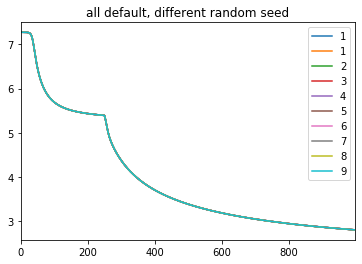

In [10]:
fig, ax = plt.subplots()
_=df0.iloc[:,1:].plot(ax=ax)
_=ax.set_title('all default, different random seed')

In [12]:
fig.savefig('./img/1.pdf')

In [13]:
# import time
# time.strftime("%H:%M",time.localtime(profdatas[2].data[0,0]))
# time.time()

In [14]:
d1s = []
for filename in ['./data/fashion-mnist/random_init_'+str(i)+'.pkl' for i in range(5)]:
    with open(filename, 'rb') as file_:
        d1s.append(dill.load(file_))

In [15]:
tools.parameters_difference(d1s[0].params)

[('initialization', 'random'), ('random_state', 0)]

In [16]:
df1 = pd.DataFrame(d1s[0].data[:,1:])
for d1 in d1s[1:]:
    name = [d1.params['random_state']]
    df1 = pd.concat([df1, pd.DataFrame(d1.data[:,2:], columns=name)], axis=1)

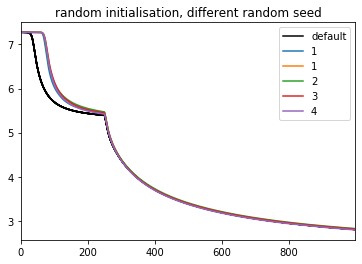

In [17]:
fig, ax = plt.subplots()
_=df0.iloc[:,1:].plot(c='k', ax=ax)
ax.legend(['default'])

_=df1.iloc[:,1:].plot(ax=ax)
_=ax.set_title('random initialisation, different random seed')


# for d0 in d0s: plt.plot(d0.data[:,2], 'r')
# for d1 in d1s: plt.plot(d1.data[:,2], 'b')

In [18]:
fig.savefig('./img/2.pdf')

In [19]:
d2s = []
for filename in ['./data/fashion-mnist/early_exaggeration_'+str(i)+'.pkl' for i in range(10)]:
    with open(filename, 'rb') as file_:
        d2s.append(dill.load(file_))

In [20]:
tools.parameters_difference(d2s[0].params)

[('early_exaggeration', 1), ('initialization', 'random'), ('random_state', 0)]

In [21]:
df2 = pd.DataFrame(d2s[0].data[:,1:])
for d2 in d2s[1:]:
    name = [d2.params['early_exaggeration']]
    df2 = pd.concat([df2, pd.DataFrame(d2.data[:,2:], columns=name)], axis=1)

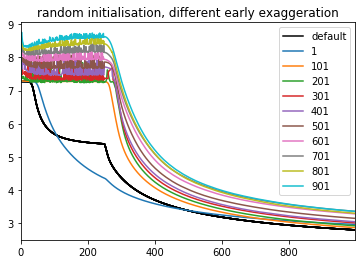

In [22]:
fig, ax = plt.subplots()
_=df0.iloc[:,1:].plot(c='k', ax=ax)
ax.legend(['default'])

_=df2.iloc[:,1:].plot(ax=ax)
_=ax.set_title('random initialisation, different early exaggeration')

In [23]:
fig.savefig('./img/3.pdf')

In [74]:
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

In [79]:
digits['images'].reshape(-1, 64)

(1797, 64)

# MNIST

In [25]:
mns = []
for filename in ['./data/mnist/default_'+str(i)+'.pkl' for i in range(1)]:
    with open(filename, 'rb') as file_:
        mns.append(dill.load(file_))

In [26]:
tools.parameters_difference(mns[0].params)

[]

In [27]:
mn0 = pd.DataFrame(mns[0].data[:,1:])

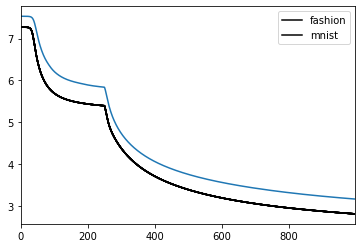

In [28]:
fig, ax = plt.subplots()
_=df0.iloc[:,1:].plot(c='k', ax=ax)
mn0.iloc[:,1:].plot(ax=ax)

ax.legend(['fashion', 'mnist'])

# KNN classification

In [29]:
mnks = []
for filename in ['./data/mnist/default_knn_'+str(i)+'.pkl' for i in range(1)]:
    with open(filename, 'rb') as file_:
        mnks.append(dill.load(file_))

In [30]:
tools.parameters_difference(mnks[0].params)

[]

In [31]:
mnk0 = pd.DataFrame(mnks[0].data[:,1:])

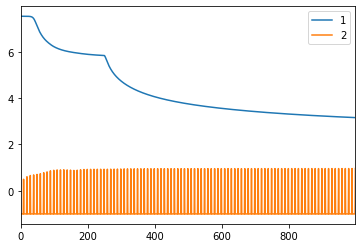

In [37]:
fig, ax = plt.subplots()
# mn0.iloc[:,1:].plot(ax=ax)
mnk0.iloc[:,1:].plot(ax=ax)

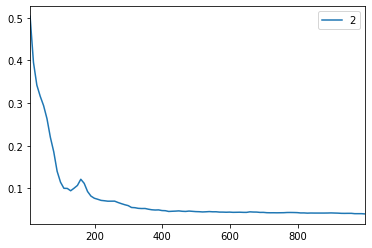

In [45]:
(1-mnk0[mnk0[2] > 0].iloc[:, 2:]).plot()